# Communicate Data Findings Project
## Based on data from Bureau of Transportation Statisctic from April 2010 till March 2020

### Project made by Daria Krasnobaeva

This document explores a dataset containing monthly information about different Airlines and their attributes, such like flughts delays and cancellations, for the timeslot of 10 years.

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [25]:
# load in the dataset into a pandas dataframe, print statistics
df= pd.read_csv('Project_data_airline_delay_causes.csv')

In [26]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

(158150, 22)
year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object


In [27]:
print(df.head(10))

   year   month carrier            carrier_name airport  \
0  2010       4      9E  Pinnacle Airlines Inc.     ABE   
1  2010       4      9E  Pinnacle Airlines Inc.     AEX   
2  2010       4      9E  Pinnacle Airlines Inc.     ALB   
3  2010       4      9E  Pinnacle Airlines Inc.     ALO   
4  2010       4      9E  Pinnacle Airlines Inc.     ATL   
5  2010       4      9E  Pinnacle Airlines Inc.     ATW   
6  2010       4      9E  Pinnacle Airlines Inc.     AUS   
7  2010       4      9E  Pinnacle Airlines Inc.     AVL   
8  2010       4      9E  Pinnacle Airlines Inc.     AVP   
9  2010       4      9E  Pinnacle Airlines Inc.     AZO   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...        109.0        8.0   
1           Alexandria, LA: Alexandria International          8.0        0.0   
2                   Albany, NY: Albany International        110.0       13.0   
3                    Waterloo,

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158150 entries, 0 to 158149
Data columns (total 22 columns):
year                   158150 non-null int64
 month                 158150 non-null int64
carrier                158150 non-null object
carrier_name           158150 non-null object
airport                158150 non-null object
airport_name           158150 non-null object
arr_flights            157987 non-null float64
arr_del15              157953 non-null float64
carrier_ct             157987 non-null float64
 weather_ct            157987 non-null float64
nas_ct                 157987 non-null float64
security_ct            157987 non-null float64
late_aircraft_ct       157987 non-null float64
arr_cancelled          157987 non-null float64
arr_diverted           157987 non-null float64
 arr_delay             157987 non-null float64
 carrier_delay         157987 non-null float64
weather_delay          157987 non-null float64
nas_delay              157987 non-null float64
secu

In [29]:
print(df.describe())

                year          month    arr_flights      arr_del15  \
count  158150.000000  158150.000000  157987.000000  157953.000000   
mean     2014.939589       6.487708     397.778298      73.040537   
std         3.082633       3.459573    1051.773244     187.527048   
min      2010.000000       1.000000       1.000000       0.000000   
25%      2012.000000       3.000000      58.000000       9.000000   
50%      2015.000000       6.000000     119.000000      21.000000   
75%      2018.000000       9.000000     286.000000      55.000000   
max      2020.000000      12.000000   21977.000000    5268.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  157987.000000  157987.000000  157987.000000  157987.000000   
mean       20.922144       2.227658      22.693087       0.135372   
std        46.020827       6.865975      69.029527       0.576120   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.900000       0.0000

### What is the structure of your dataset?

We have information about 158.149 flights from different carries. For those carries wie have 21 points of information (the last column Unnamed:21 is empty and will not be included in futher anaylses)

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are information about cause of delay and cancelation of flights of different carries.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There is five cause of delay - Carrier, Weather, NAS, Security and Late Aircraft, as well as there are two cancelation information - cancelated or diverted flight. 

I wann analyse per Year which reason was the strongest and which carries had the most cancelation and diverted rate and see if I can find some patterns.

## Univariate Exploration

I'll start by looking at the distribution of the delays reasons and cancelation rate.

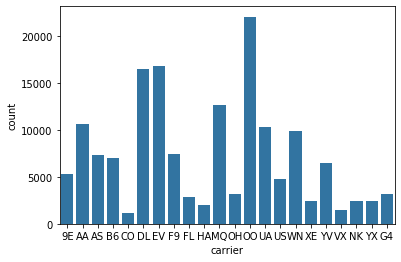

In [36]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='carrier', color = base_color)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

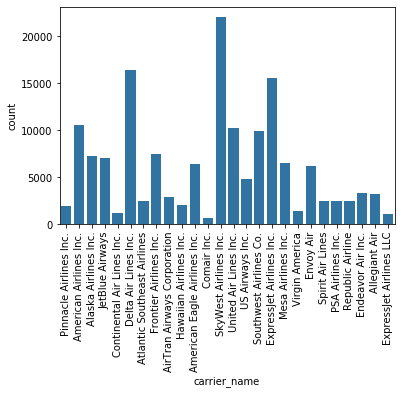

In [40]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='carrier_name', color = base_color)
plt.xticks(rotation=90)

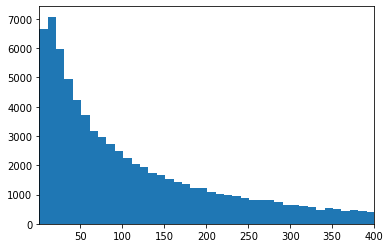

In [53]:
bin_edges=np.arange(1,df['weather_delay'].max()+10,10)
plt.hist(data = df, x = 'weather_delay', bins = bin_edges)
plt.xlim((1,400));

#excluding 0 for the best picture of distribution

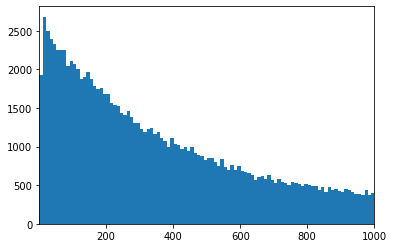

In [62]:
bins =np.arange(1,df[' carrier_delay'].max()+10,10)
plt.hist(data = df, x = ' carrier_delay', bins = bins);
plt.xlim((1,1000));

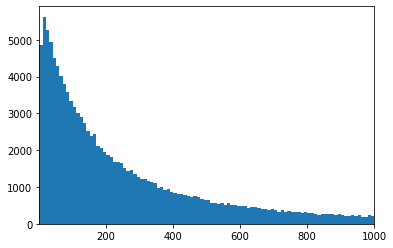

In [64]:
bins =np.arange(1,df['nas_delay'].max()+10,10)
plt.hist(data = df, x = 'nas_delay', bins = bins);
plt.xlim((1,1000));

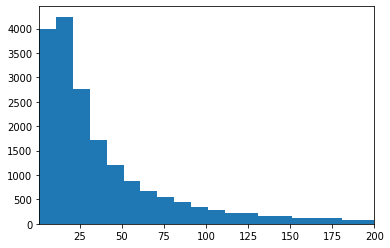

In [66]:
bins =np.arange(1,df['security_delay'].max()+10,10)
plt.hist(data = df, x = 'security_delay', bins = bins);
plt.xlim((1,200));

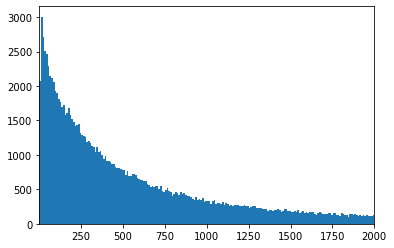

In [68]:
bins =np.arange(1,df['late_aircraft_delay'].max()+10,10)
plt.hist(data = df, x = 'late_aircraft_delay', bins = bins);
plt.xlim((1,2000));

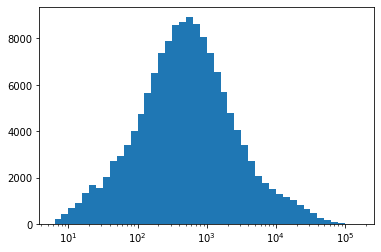

In [76]:
bin_edges = 10 ** np.arange(0.8, np.log10(df['late_aircraft_delay'].max())+0.1, 0.1)
plt.hist(df['late_aircraft_delay'], bins = bin_edges)
plt.xscale('log')
#tick_locs = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
#plt.xticks(tick_locs, tick_locs);